# Notebook 3:  Agrupamiento Jerárquico y Redes de Kohonen 
En este notebook vamos a implementar dos algoritmos de clustering: el agrupamiento jeráquico  de clustering y los mapas autoorganizados (SOM) o redes de Kohonen en R. El objetivo es entender como funcionan estos algoritmos y  aprender a utilizarlos con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

In [7]:
help(hclust)

hclust                  package:stats                  R Documentation

_H_i_e_r_a_r_c_h_i_c_a_l _C_l_u_s_t_e_r_i_n_g

_D_e_s_c_r_i_p_t_i_o_n:

     Hierarchical cluster analysis on a set of dissimilarities and
     methods for analyzing it.

_U_s_a_g_e:

     hclust(d, method = "complete", members = NULL)
     
     ## S3 method for class 'hclust'
     plot(x, labels = NULL, hang = 0.1, check = TRUE,
          axes = TRUE, frame.plot = FALSE, ann = TRUE,
          main = "Cluster Dendrogram",
          sub = NULL, xlab = NULL, ylab = "Height", ...)
     
_A_r_g_u_m_e_n_t_s:

       d: a dissimilarity structure as produced by 'dist'.

  method: the agglomeration method to be used.  This should be (an
          unambiguous abbreviation of) one of '"ward.D"', '"ward.D2"',
          '"single"', '"complete"', '"average"' (= UPGMA), '"mcquitty"'
          (= WPGMA), '"median"' (= WPGMC) or '"centroid"' (= UPGMC).

 members: 'NULL' or a vector w

In [3]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

[1] 25  5

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

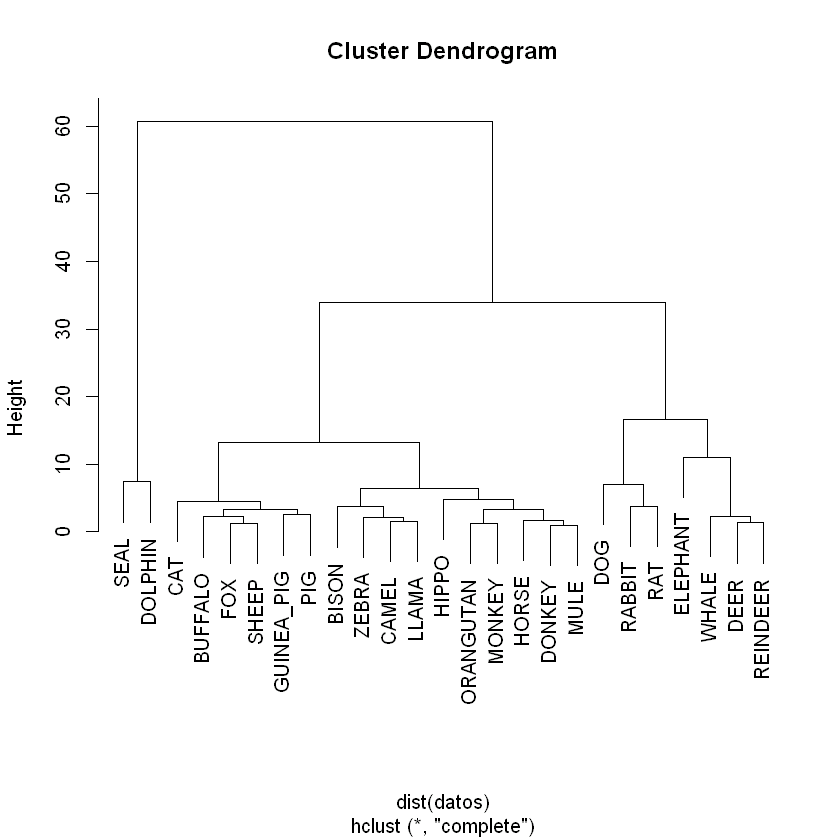

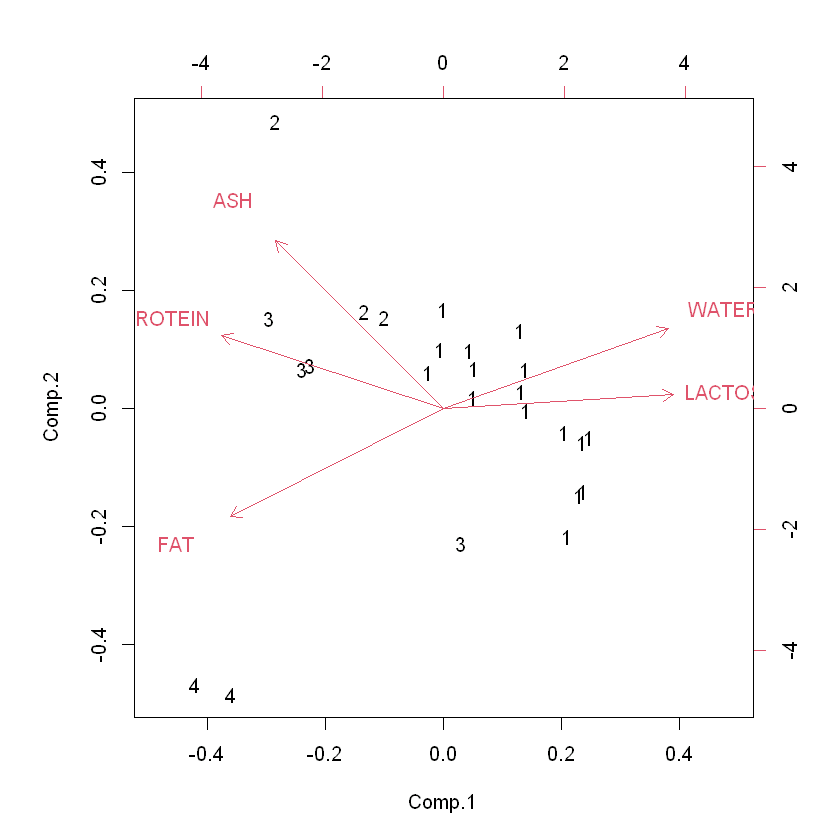

In [4]:
res3 <- hclust(dist(datos))
plot(res3)
res <- princomp(datos, cor=TRUE)
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 1:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 


## A: 

`hclust` es un algoritmo de agrupamiento jerarquico que agrupa los elementos que son mas similares entre si en un arbol llamado dendrograma, creando una jerarquia.

Parametros de entrada:
- `dist(datos)`: Calcula la distancia entre cada observacion en el conjunto de datos. 
- `method`: define el metodo de vinculacion, puede ser "complete", "single", "average", "ward.D".....

Parametros de salida:
- `merge`: matriz con los grupos combinados.
- `height` la altura a la que se han unido los grupos.
- `labels` nombres de las observaciones
- `order` el orden en que los elementos aparecen en el dendrograma.

---
## B: 

Dendrograma:

se muestra como se agrupan las observaciones a medida que se va construyendo el arbol jerarquico. Cada rama representa un grupo de observaciones, se agrupan por la altura de corte en el arbol, osea, que tan similar es cada grupo, cuanto menor la altura mayor sera la similitud entre los elementos del grupo, igualmente el corte esta en 4 grupos.

- Por ejemplo, se observa que el SEAL y DOLPHIN estan agrupados a una altura muy baja, esto indica que estos dos animales tienen características muy similares, pero por ejemplo el ELEPHANT y el REINDEER estan mas alejados en el dendrograma, significa son mas distintos en comparacion.

Biplot:

aqui se muestra como los datos estan distribuidos en dos dimensiones principales. en este caso se representa un animal o un  lacteo y la direccion de las flechas muestra la relacion de cada variable con las componentes principales.

- Por ejemplo PROTEIN esta mas cerca del eje X, entonces significa que la cantidad de proteina es relevante en la componente 1.

---

## C:

Se probaron cambiando los metodos de vinculacion que definen como se determinan las formas de agrupar:


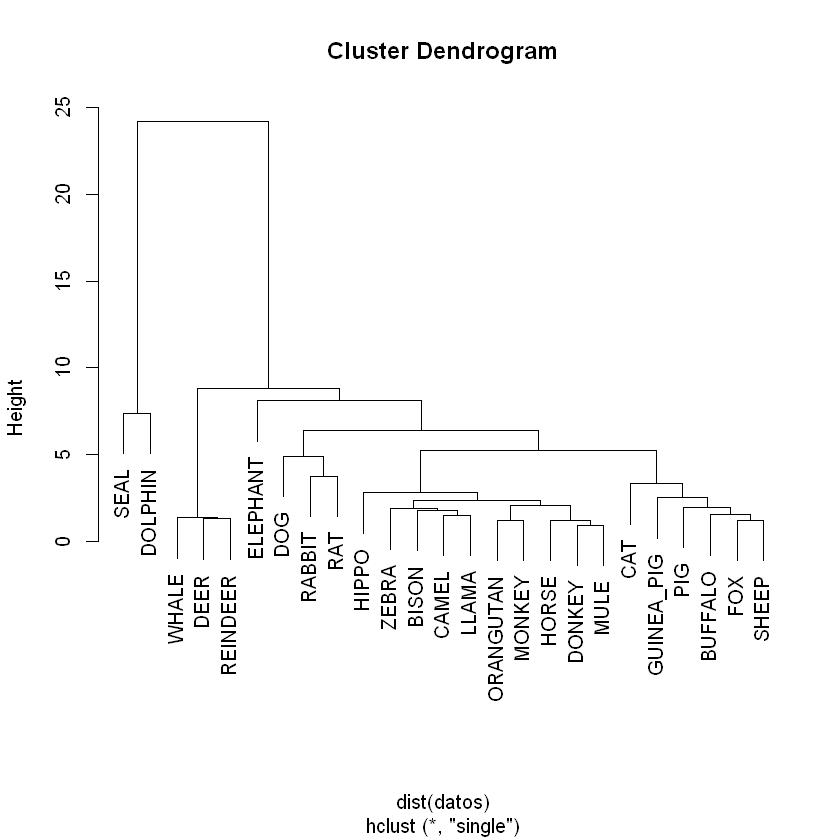

In [5]:
# Vinculacion Simple
# Se considera la distancia minima entre dos observaciones de diferentes grupos
res_single <- hclust(dist(datos), method = "single")
plot(res_single)


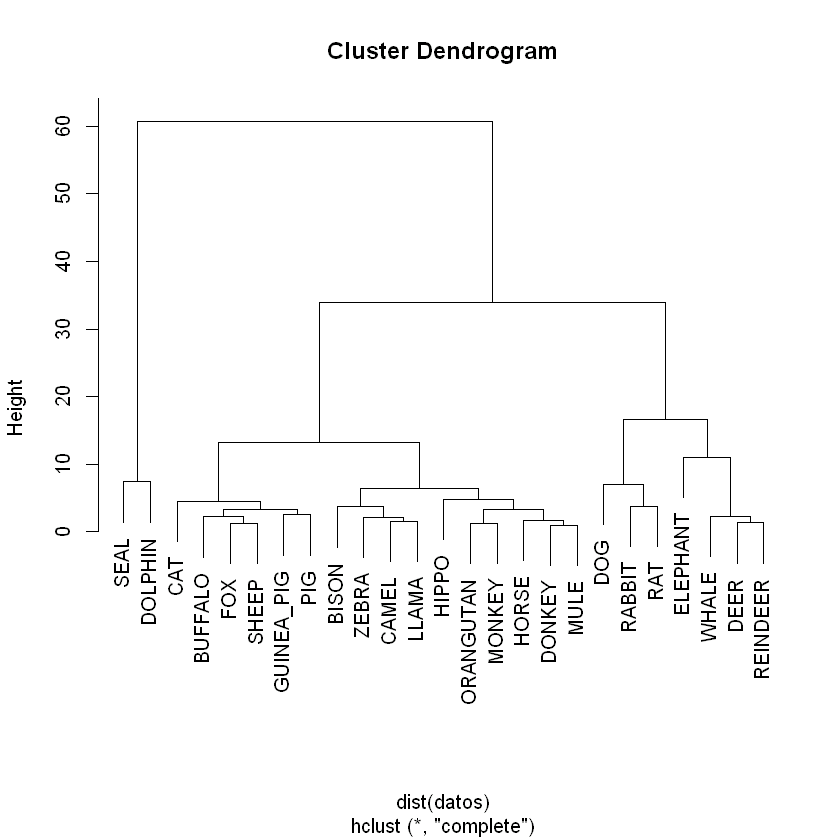

In [6]:
# Vinculacion Completa
# Se considera la distancia maxima entre dos observaciones de diferentes grupos
res_complete <- hclust(dist(datos), method = "complete")
plot(res_complete)


In [ ]:
# Vinculacion Promedio
# Se calcula la distancia media entre los elementos de diferentes grupos
res_average <- hclust(dist(datos), method = "average")
plot(res_average)


In [ ]:
# Metodo Ward
# se minimiza la varianza dentro de los grupos y se maximiza la varianza entre los grupos
res_ward <- hclust(dist(datos), method = "ward.D")
plot(res_ward)


dependiendo los metodos utilizados se comprimen mas los grupos o menos, el punto de corte tambien varia.

**A continuación instalamos la biblioteca kohonen para utilizar som, el método de mapas autoorganizados que permite realizar un análisis de agrupamiento**

In [10]:
#install.packages("kohonen")
library(kohonen)
set.seed(7)

ERROR: Error in library(kohonen): no hay paquete llamado 'kohonen'


In [ ]:
help(som)

supersom {kohonen},R Documentation
"X, Y","numerical data matrices, or factors. No data.frame objects are allowed - convert them to matrices first."
data,"list of data matrices (numerical) of factors. If a vector is entered, it will be converted to a one-column matrix. No data.frame objectss are allowed."
grid,a grid for the codebook vectors: see somgrid.
rlen,the number of times the complete data set will be presented to the network.
alpha,"learning rate, a vector of two numbers indicating the amount of change. Default is to decline linearly from 0.05 to 0.01 over rlen updates. Not used for the batch algorithm."
radius,"the radius of the neighbourhood, either given as a single number or a vector (start, stop). If it is given as a single number the radius will change linearly from radius to zero; as soon as the neighbourhood gets smaller than one only the winning unit will be updated. Note that the default before version 3.0 was to run from radius to -radius. If nothing is supplied, the default is to start with a value that covers 2/3 of all unit-to-unit distances."
whatmap,What data layers to use. If unspecified all layers are used.
user.weights,"the weights given to individual layers. This can be a single number (all layers have the same weight, the default), a vector of the same length as the whatmap argument, or a vector of the same length as the data argument. In xyf maps, this argument provides the same functionality as the now-deprecated xweight argument that was used prior to version 3.0."
maxNA.fraction,the maximal fraction of values that may be NA to prevent the row to be removed.
keep.data,"if TRUE, return original data and mapping information. If FALSE, only return the trained map (in essence the codebook vectors)."


[[1]]
        WATER    PROTEIN        FAT     LACTOSE         ASH
V1 -2.5356874  1.0729314  2.6899058 -2.02042124 -0.32965999
V2 -0.7799697  1.2599683  0.6351271 -0.96937503  1.62080612
V3  0.1782588  0.2255258 -0.2440329  0.02172521  0.05902769
V4  0.8071564 -0.9927413 -0.7233456  0.86466273 -0.73162491



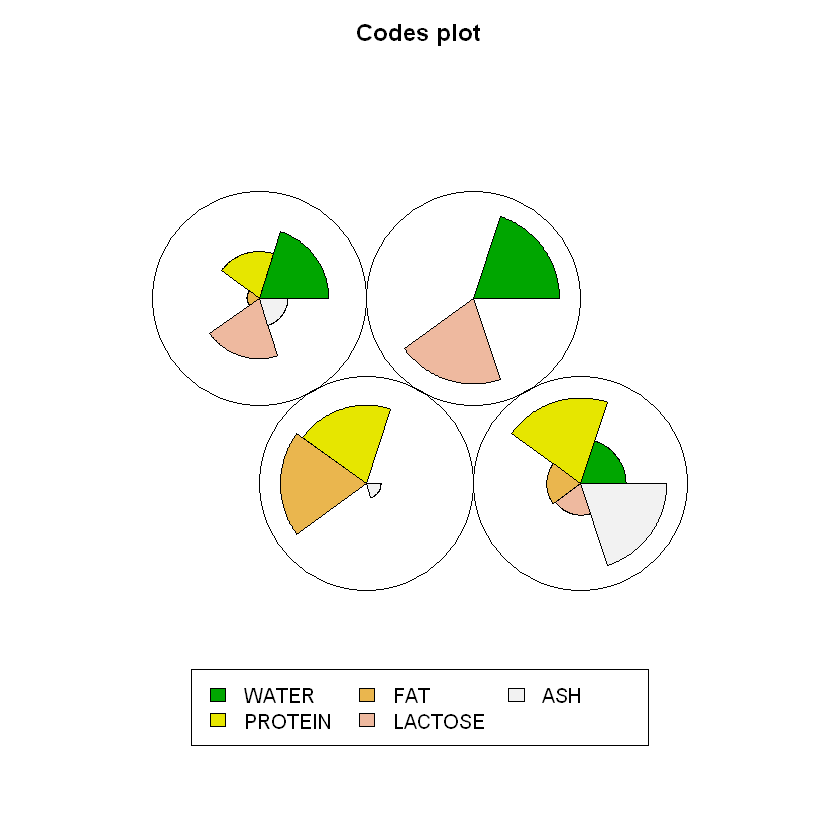

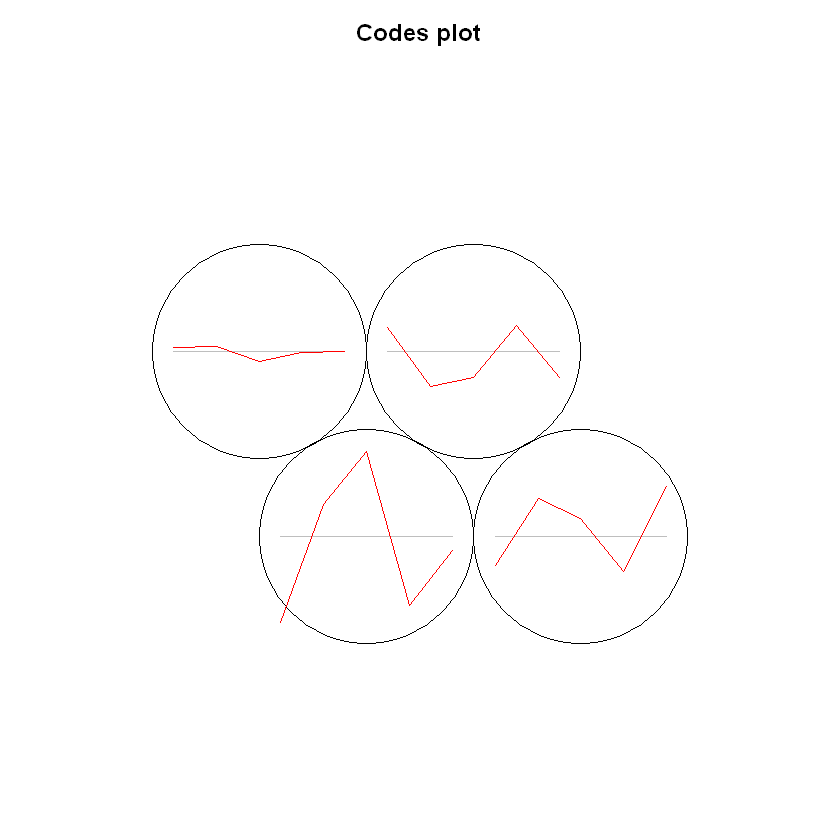

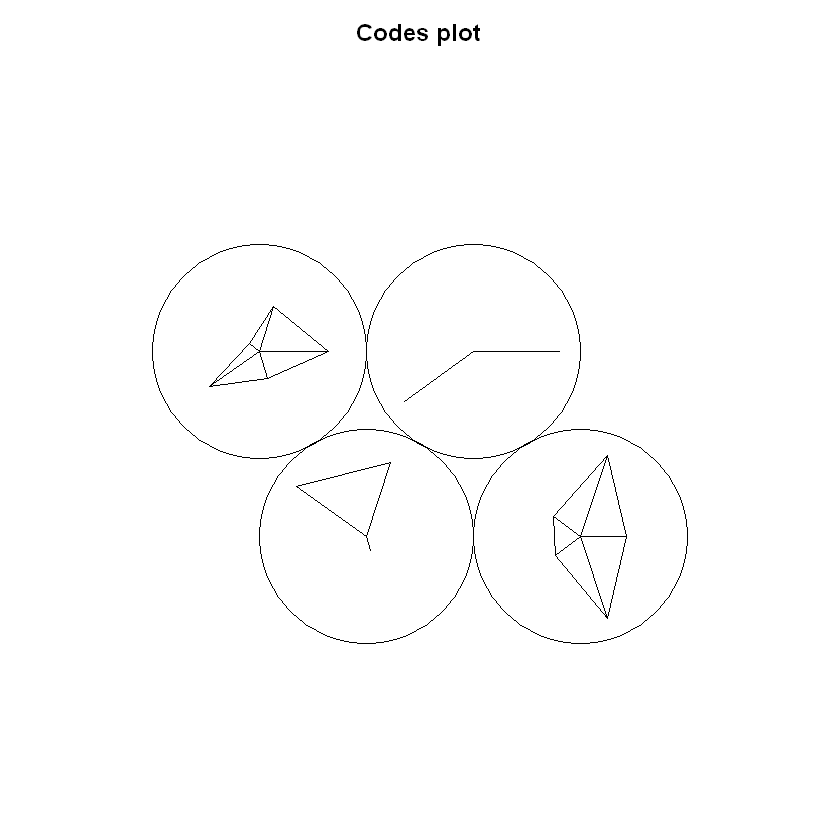

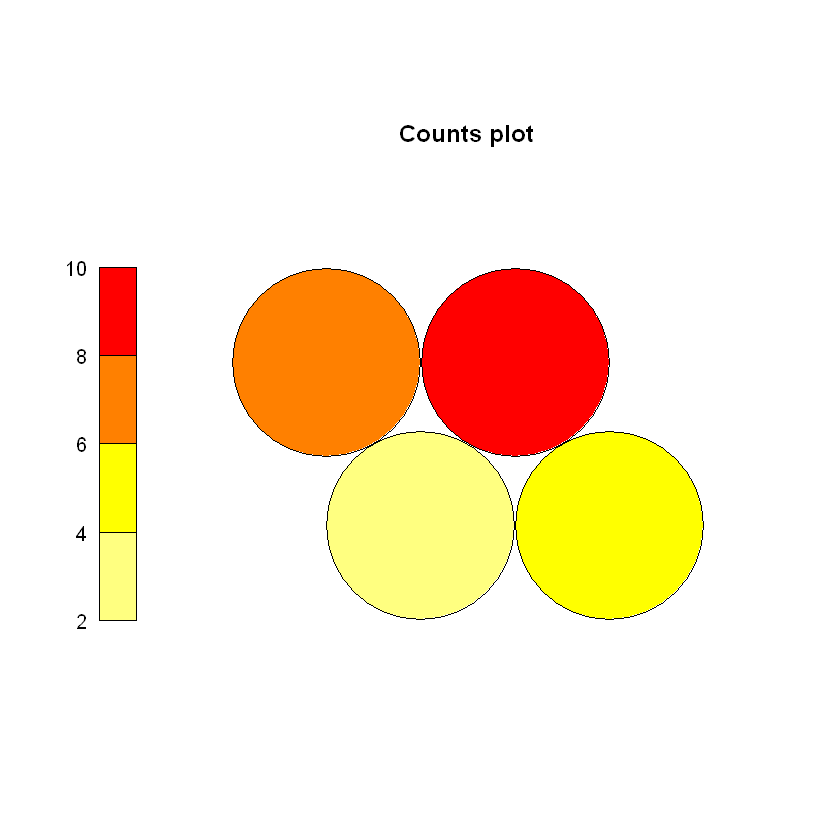

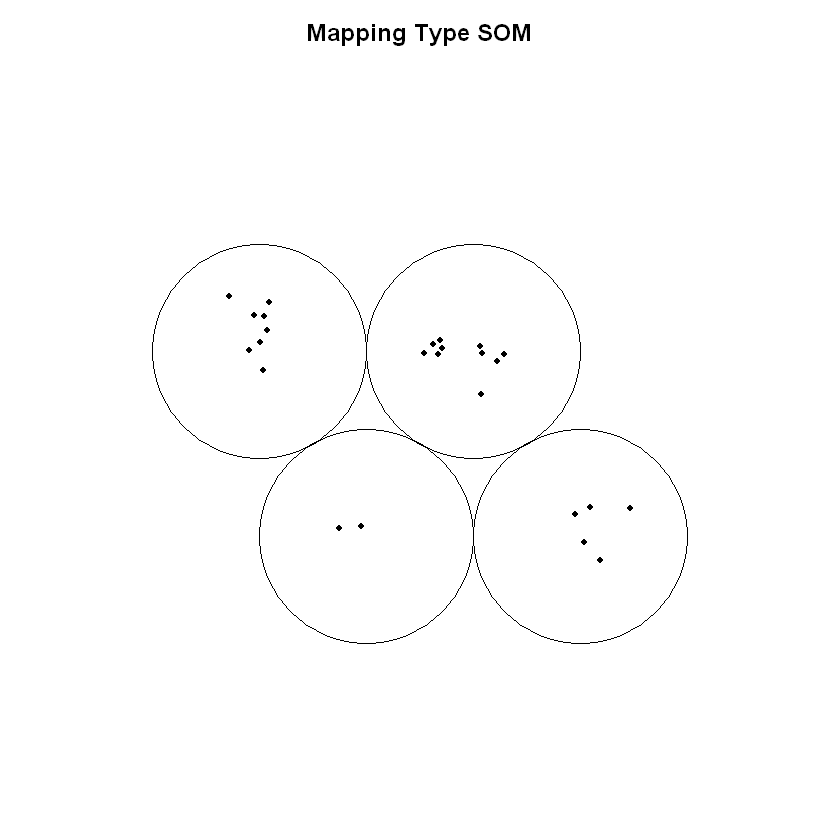

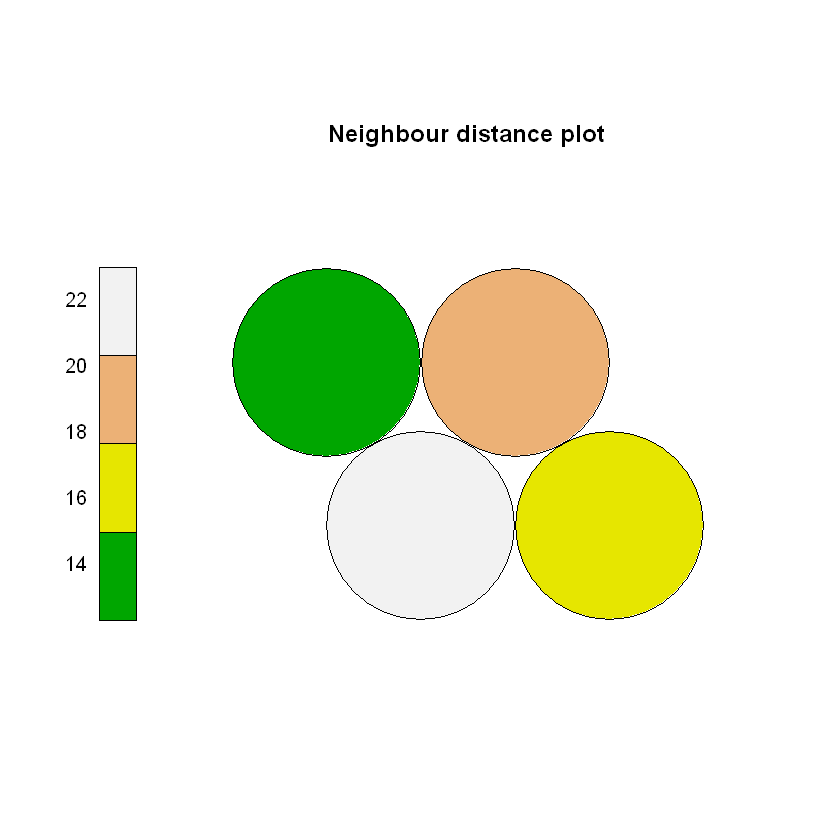

In [ ]:
#create SOM grid
sommap <- som(scale(datos), rlen=1000, grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


**Ejercicio 2:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

c) Compare estos resultados con los del agrupamiento jerárquico. Discuta sus resultados.

**Ejercicio 3:**

Considere el subconjunto de datos del archivo tiposMusica.csv que ha estudiado en las tareas anteriores. 

a) Escoja dos de los cuatro métodos de agrupamiento estudiado en esta unidad y realice un análisis de agrupamiento con estos datos. 

b) Compare sus resultados con la medida de calidad de su preferencia y considerando la etiqueta del tipo de música disponible en la primera columna de datos. Discuta sus resultados.

a) Utilizaremos K-Means y GMM

[1] "Tabla cruzada: K-means vs Géneros"
            
generos       1  2  3  4
  Classical   0 45  0 26
  Electronic 26  1 10  2
  Rock        6  2 31  0


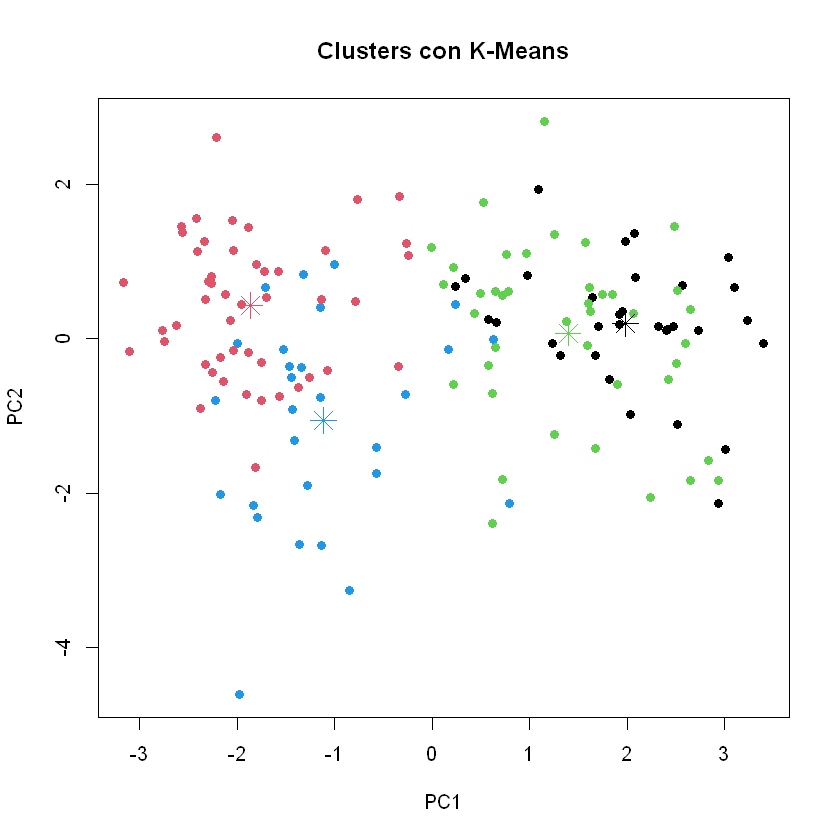

[1] "Tabla cruzada: GMM vs Géneros"
            
generos       1  2  3  4
  Classical  25  8 36  2
  Electronic  0  6  0 33
  Rock        0  6  0 33
ARI (K-means): 0.6932541 
ARI (GMM): 0.4955698 
Silhouette promedio (K-means): 0.1579631 
Silhouette promedio (GMM): 0.1235796 


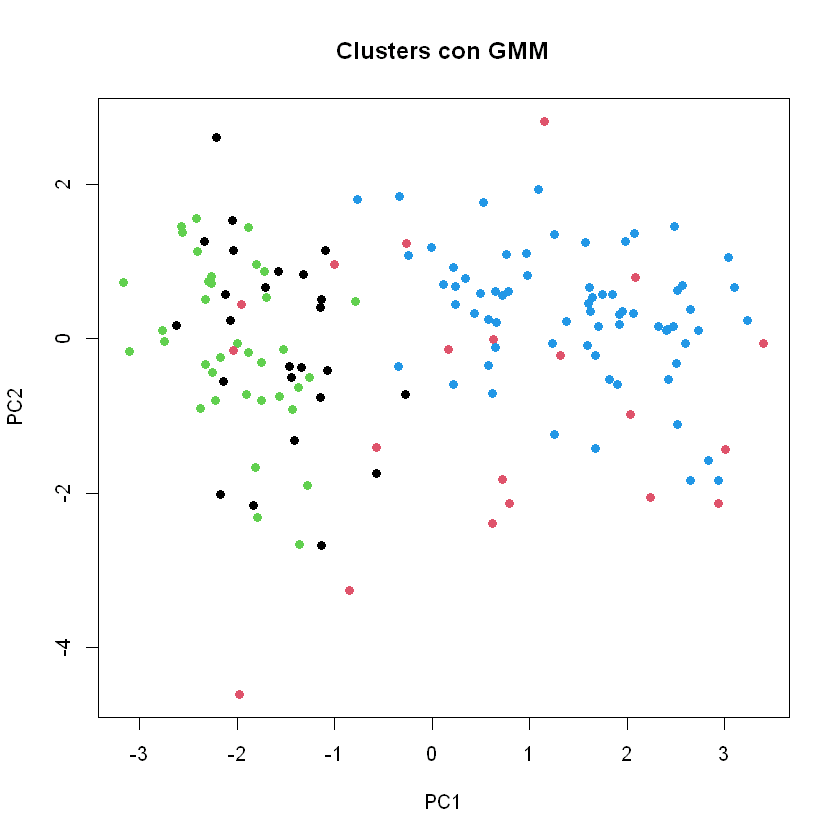

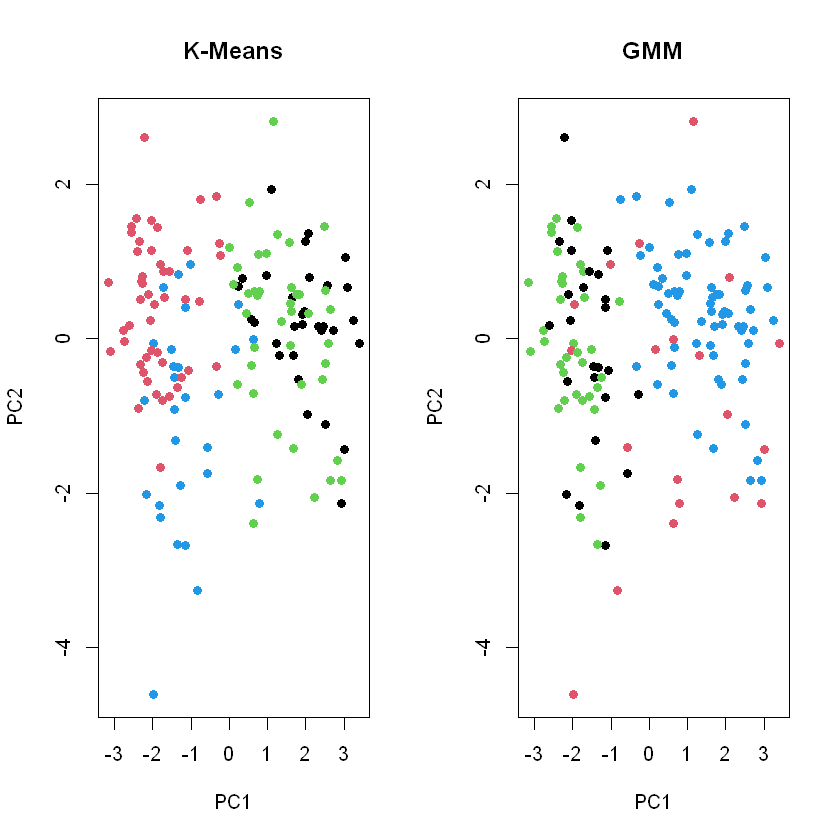

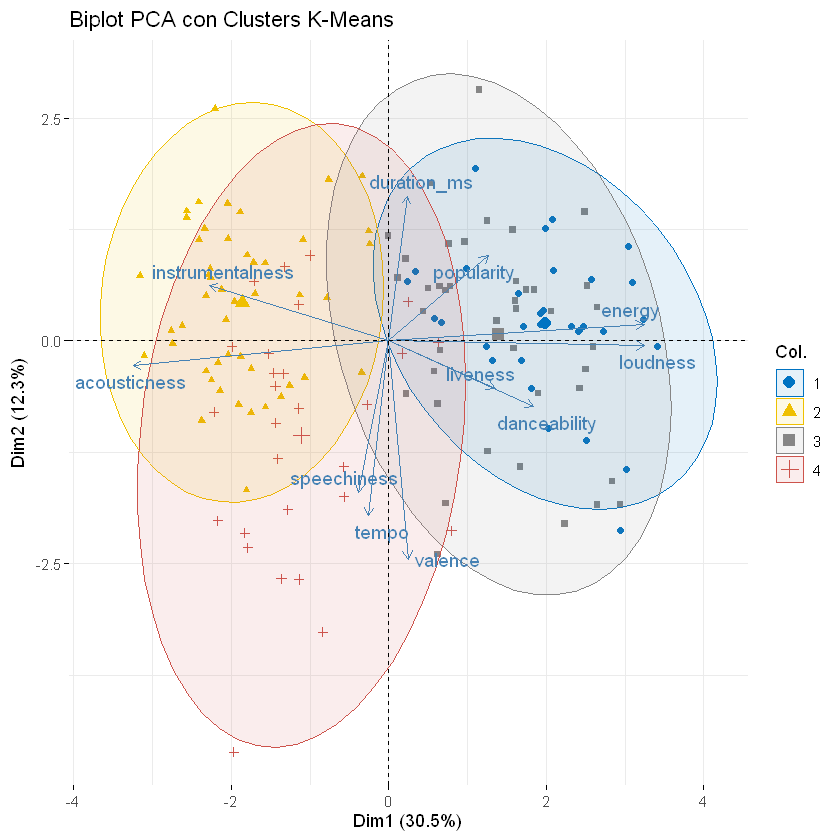

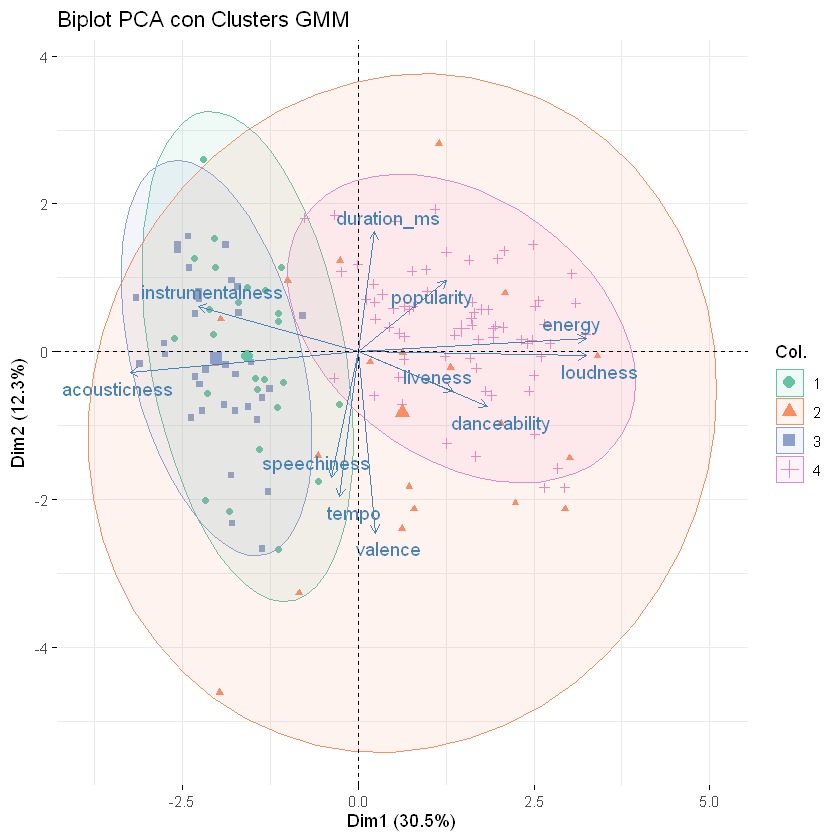

In [29]:
musica <- read.csv("..//data//tiposMusica.csv", header = TRUE, sep = ";", dec = ".")

# Filtrar columnas numéricas (características de audio)
caracteristicas <- musica[, c("popularity", "acousticness", "danceability", "duration_ms", 
                              "energy", "instrumentalness", "liveness", "loudness", 
                              "speechiness", "tempo", "valence")]

# Guardar etiquetas de género
generos <- musica$genre

# Normalizar los datos
datos_esc <- scale(caracteristicas)

# -------------------------------
# K-Means
# -------------------------------
k <- 4
km <- kmeans(datos_esc, centers = k, nstart = 10)

# PCA
pca <- princomp(datos_esc, cor = TRUE)

# Gráfico PCA con K-Means
plot(pca$scores[, 1:2], col = km$cluster, pch = 19,
     xlab = "PC1", ylab = "PC2", main = "Clusters con K-Means")
centroides <- predict(pca, km$centers)
points(centroides[, 1:2], col = 1:k, pch = 8, cex = 2)

# Tabla K-Means vs Géneros
tabla_kmeans <- table(generos, km$cluster)
print("Tabla cruzada: K-means vs Géneros")
print(tabla_kmeans)


# GMM

library(mclust)
set.seed(321)
gmm <- Mclust(datos_esc, G = k)

# Gráfico PCA con GMM
plot(pca$scores[, 1:2], col = gmm$classification, pch = 19,
     xlab = "PC1", ylab = "PC2", main = "Clusters con GMM")

# Tabla GMM vs Géneros
tabla_gmm <- table(generos, gmm$classification)
print("Tabla cruzada: GMM vs Géneros")
print(tabla_gmm)

# Evaluación de Calidad

library(fossil)
ari_km <- adj.rand.index(as.numeric(factor(generos)), km$cluster)
ari_gmm <- adj.rand.index(as.numeric(factor(generos)), gmm$classification)

cat("ARI (K-means):", ari_km, "\n")
cat("ARI (GMM):", ari_gmm, "\n")

library(cluster)
distancias <- dist(datos_esc)

sil_kmeans <- silhouette(km$cluster, distancias)
sil_prom_km <- mean(sil_kmeans[, 3])

sil_gmm <- silhouette(gmm$classification, distancias)
sil_prom_gmm <- mean(sil_gmm[, 3])

cat("Silhouette promedio (K-means):", sil_prom_km, "\n")
cat("Silhouette promedio (GMM):", sil_prom_gmm, "\n")


# Visualización Comparativa Final
par(mfrow = c(1, 2))
plot(pca$scores[, 1:2], col = km$cluster, pch = 19,
     xlab = "PC1", ylab = "PC2", main = "K-Means")
plot(pca$scores[, 1:2], col = gmm$classification, pch = 19,
     xlab = "PC1", ylab = "PC2", main = "GMM")
par(mfrow = c(1, 1))


# Biplots con Clusters (PCA)


library(factoextra)

# Biplot con K-Means
fviz_pca_biplot(pca,
                geom.ind = "point",
                col.ind = as.factor(km$cluster),
                palette = "jco",
                addEllipses = TRUE,
                label = "var", repel = TRUE) +
  ggtitle("Biplot PCA con Clusters K-Means")

# Biplot con GMM
fviz_pca_biplot(pca,
                geom.ind = "point",
                col.ind = as.factor(gmm$classification),
                palette = "Set2",
                addEllipses = TRUE,
                label = "var", repel = TRUE) +
  ggtitle("Biplot PCA con Clusters GMM")



b) Comparación y discusión de resultados

Para evaluar la calidad de los agrupamientos obtenidos con K-Means y GMM, 
utilicé dos métricas: el Índice de Rand Ajustado (ARI) y el indice de Silhouette promedio.


El ARI compara los clusters generados con las etiquetas reales de los géneros musicales. En este caso, el ARI para K-Means fue de 0.693,
mientras que para GMM fue de 0.496. Esto indica que K-Means tuvo una mayor concordancia con las categorías reales, agrupando de forma 
más coherente según el género.

Por otro lado, el índice de Silhouette, que evalúa qué tan bien se separan y cohesionan los clusters, 
fue de 0.158 para K-Means y 0.124 para GMM. Nuevamente, K-Means mostró un mejor desempeño, ya que sus clusters presentan 
una mayor distancia con respecto a otros grupos y mayor cohesión interna.

Analizando los gráficos de biplots PCA, podemos observar que en el biplot de K-Means los clusters están mejor definidos y más separados entre sí. El cluster 1 (azul) se asocia principalmente con características como energy, loudness y danceability, mientras que el cluster 2 (amarillo) se relaciona más con instrumentalness y acousticness. Esta separación visual confirma los mejores valores de las métricas para K-Means.

En el biplot de GMM, se aprecia un mayor solapamiento entre clusters, especialmente entre los clusters 1 y 3, lo que explica su menor valor de Silhouette. Además, el cluster 2 (naranja) abarca un área mucho más grande y menos definida.

En resumen, ambos métodos lograron identificar ciertos patrones en los datos, pero K-Means fue más eficaz tanto en su alineación con las etiquetas reales como en la calidad estructural de sus clusters. Por lo tanto, K-Means es el método más adecuado para este conjunto de datos en este análisis.